<a href="https://colab.research.google.com/github/Aya-Jafar/Python/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd 
import seaborn as sbn
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

# Find outliers with IQR

In [4]:
def find_upper_and_lower_fence(dataset,feature):
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    return [lower_fence,upper_fence]
    
find_upper_and_lower_fence(df,'Fresh')

[-17581.25, 37642.75]

In [12]:
def find_outliers(dataset,feature,func):
    lower_and_upper = func(dataset,feature)
    lower = lower_and_upper[0]
    upper = lower_and_upper[1]
    outliers = dataset[ (dataset[feature] < lower ) | (dataset[feature] > upper) ]
    return outliers[feature].shape


In [13]:
find_outliers(df,'Frozen',find_upper_and_lower_fence)

(43,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


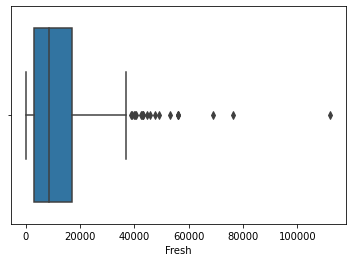

In [17]:
def make_box_plot(df,feature):
  sbn.boxplot(df[feature])

make_box_plot(df,'Fresh')

In [20]:
df.shape

(440, 8)

In [21]:
for i in df.columns:
    lower,upper = find_upper_and_lower_fence(df,i)
    df = df[~((df[i] < lower) | (df[i] > upper ))]

In [22]:
df.shape

(318, 8)

# Illustration for the box plot

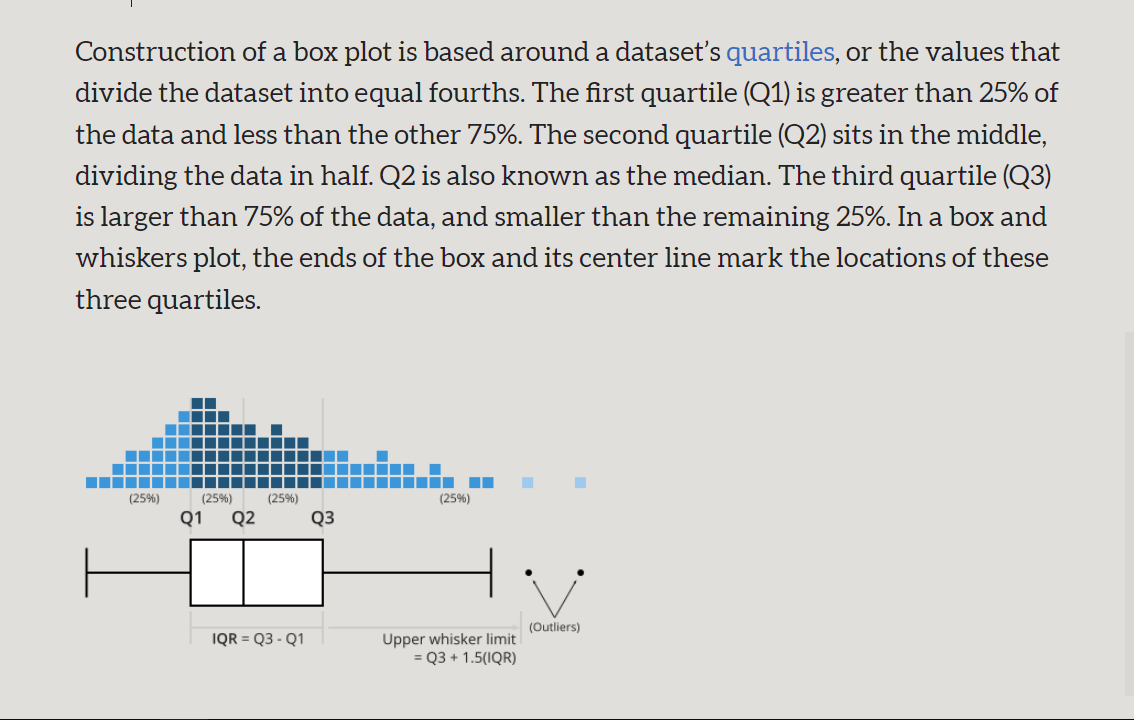